# 02 - Probabilidade

Nessa aula, iremos tratar dos seguintes conteúdos:
- Probabilidade
- Variável Aleatória
- Espaço Amostral
- Probabilidade - Definição
- Probabilidade da Uniâo de Eventos
- Eventos Independentes
- Teorema de Bayes

In [1]:
import seaborn as sns

In [4]:
df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
print(df_tips['time'].count())
print(df_tips['time'].value_counts())

244
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [4]:
df_tips['time'].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [ ]:
176/244

0.7213114754098361

In [ ]:
# Variavel Aleatória A: Jantar
# P(A) = 0.72
# P(A) = 176/244
# P(A) = qtd_jantar/qtd_dados
# P(A) = S(A)/w

<img src = "https://www.estudopratico.com.br/wp-content/uploads/2014/06/probabilidade-calcular-e1586431045913-1200x675.jpg" width=800>

## Probabilidade

Probabilidade é a área da matemática que estuda **eventos aleatórios**, cujos resultados são **probabilísticos** ou **estocásticos**.

Existem poucos sistemas na natureza que são de fato inerentemente aleatórias e não-determinísticas. No entanto, uma descrição determinística pode ser muito complicada, de modo que **se torna conveniente** tratar o sistema como um sistema estocástico.

Ex.: lançamento de moeda, lançamento de dados, etc.

O objetivo da estatística é similar: analisar dados ou criar modelos que **generalizem relações** que não podem ser determinadas diretamente uma vez que não temos acesso à população. Neste sentido, há muita probabilidade envolvida em estatística, e é por isso que vamos olhar para os principais conceitos de probabilidade.

## Variável aleatória

Uma **variável aleatória** é uma variável cujo valor depende de fatores **não-deterministícos**, isto é, **probabilísticos**.

**Exemplo**: resultado do lançamento de um dado.

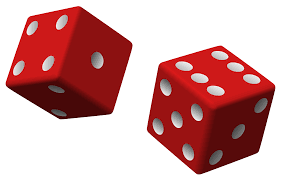

In [ ]:
# Faces do Dado = 6
# Variavel aleatoria A: Sair 1 no dado
# P(A) = 1/6

In [ ]:
# w = {1, 2, 3, 4, 5, 6, 1} # Espaço amostral (lançamentos de um dado)
# Variavel aleatoria A: Sair 1 no dado
# P(A) = 2/7

## Espaço amostral

Chamamos de **espaço amostral** o conjunto de **todos os resultados possíveis de um certo fenômeno aleatório**, ou seja, **os valores possíveis que a variável aleatória de interesse pode assumir**. Representamos o espaço amostral pela letra grega $\omega$.

Os subconjuntos de $\omega$ são denominados **eventos** e representados pelas letras latinas maiúsculas A, B, etc.

**Exemplo**: o espaço amostral dos resultados do lançamento de um dado é:

$$ \omega = \{1, 2, 3, 4, 5, 6\} $$

Alguns eventos possíveis são:

- Evento A = {3} : o resultado do lançamento do dado foi 3;
- Evento B = {5} : o resultado do lançamento do dado foi 5.

**Exemplo 2**: considere o lançamento de uma moeda:

<img src="https://www.vertica.com/wp-content/uploads/2019/07/Coin_Flip_183981489-2160.jpg" width=300>

- Se lançarmos uma única moeda:
    - A variável aleatória será **o resultado do lançamento da moeda**
    - Portanto, o espaço amostral é: $$ \omega = \{ K, C \} $$
    
- Se lançarmos duas moedas:
    - A variável aleatória será **o resultado do lançamento de cada moeda**
    - Portanto, o espaço amostral é: $$ \omega = \{ (K, K), (K, C), (C, K), (C, C) \} $$

## Definição de probabilidade

Definimos uma função $P(.)$ denominada **probabilidade** que deve satisfazer as seguintes propriedades:
    
- $0\leq P(A) \leq 1$

- $ P(\omega)=1$

- $ P(\cup A_{j})= \sum_{j=1}^{n}P(A_{j})$

## Atribuindo probabilidades aos elementos do espaço amostral

Há, essencialmente, duas formas de se **atribuir a probabilidade de cada evento**:

1. Baseando-se em características teóricas acerca do experimento.

**Exemplo**: ao lançarmos um dado, temos o espaço amostral $\omega=\{1,2,3,4,5,6\}$.

Admitindo que o dado foi construído de forma homogênea e com medidas rigorosamente simétricas, não temos nenhuma razão para **privilegiar uma face em detrimento das demais**.

Assim, consideramos: $p(1) = p(2) = p(3) = p(4) = p(5) = p(6) = \frac{1}{6}$

**Exemplo**: Desejamos fazer uma pesquisa de mercado para tirar conclusões sobre uma mudança no nosso produto.

Para isso, precisamos inferer se as respostas que temos podem tirar conclusões mais claras.

Assim, temos que a distribuição de probabilidade de acontecer cada uma das respostas é conhecida. Espaço amostral para a questão 1: $\omega=\{1, 2, 3, 4, 5, 6\}$

E considerando: $p(1) = 1/12, p(2) = 1/8, p(3) = 1/4, p(4) = 1/6, p(5) = 1/4, p(5) = 1/8$.

2. Fazendo muitos experimentos.

**Exemplo**: Imagine que temos uma moeda não-honesta, que tende cair mais vezes cara do que coroa. Para descobrirmos qual é a probabilidade de cada um dos eventos ($\omega = \{K, C\}$), podemos lançar a moeda muitas vezes, e anotar os resultados:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
N = 1000

todas_amostras = np.random.uniform(size=N)
resultados = np.where(todas_amostras <= 0.5, 'K', 'C')
# resultados = []
# for amostra in todas_amostras:
#   if amostra <= 0.5:
#     resultados.append('K')
#   else:
#     resultados.append('C')

pd.DataFrame({'Moeda': resultados}).value_counts(normalize=True)

Moeda
K        0.528
C        0.472
Name: proportion, dtype: float64

In [7]:
N = 1000

todas_amostras = np.random.uniform(size=N)
resultados = np.where(todas_amostras <= 0.3, 'K', 'C')
# resultados = []
# for amostra in todas_amostras:
#   if amostra <= 0.5:
#     resultados.append('K')
#   else:
#     resultados.append('C')

pd.DataFrame({'Moeda': resultados}).value_counts(normalize=True)

Moeda
C        0.693
K        0.307
Name: proportion, dtype: float64

<Axes: ylabel='Count'>

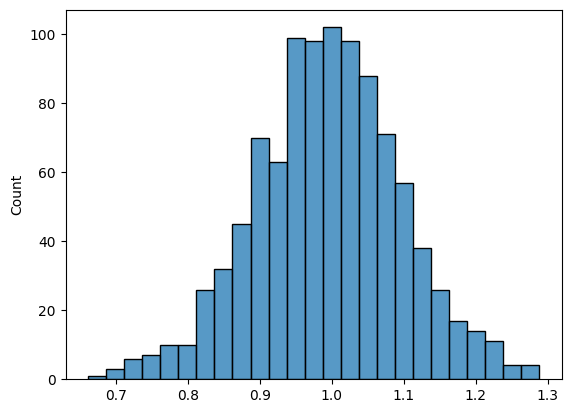

In [8]:
sns.histplot(np.random.normal(1, 0.1, size=1000))

<Axes: >

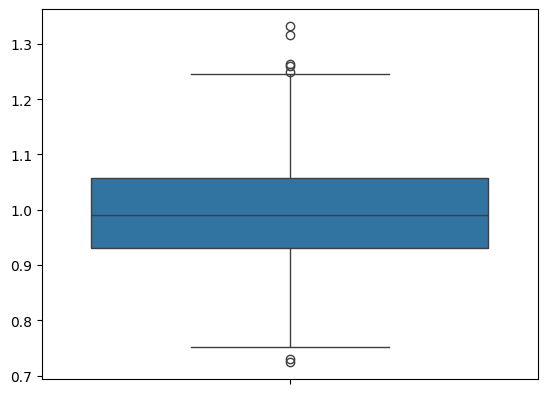

In [9]:
sns.boxplot(np.random.normal(1, 0.1, size=1000))

**Cuidado com a probabilidade teórica e experimental**

In [ ]:
# w = (K, C)
# A: sair K na moeda
# P(A) = S(A)/S(w)
# P(A) = 1/2 = 0.5

## Probabilidade da União de Eventos (Dependentes)

Dados dois elementos $A$ e $B$, o cálculo da união desses eventos é determinada da seguinte forma:
    
$$ P(A ∪ B) = P(A) + P(B) - P(A ∩ B) $$

"A probabilidade da união de dois eventos é a probabilidade de um primeiro ou de um segundo evento ocorrer."

"A probabilidade da união de dois eventos é a chance do primeiro ou do segundo evento ocorrer."


![https://static.mundoeducacao.uol.com.br/mundoeducacao/2020/05/1-dois-conjuntos.jpg](https://static.mundoeducacao.uol.com.br/mundoeducacao/2020/05/1-dois-conjuntos.jpg)

![https://static.todamateria.com.br/upload/su/bc/subconjunto1.jpg?auto_optimize=low](https://static.todamateria.com.br/upload/su/bc/subconjunto1.jpg?auto_optimize=low)

__Exemplo:__   Qual é a probabilidade de que em um lançamento de um dado saia um número par ou maior do que três?

In [ ]:
# w = {1, 2, 3, 4, 5, 6}

# A = 'obter um numero par'
# B = 'obter um numero maior que 3'

# S(A) = S({2, 4, 6}) = 3
# S(B) = S({4, 5, 6}) = 3

# S(A e B) = S({4, 6}) = 2

# P(A união B) = P(A) + P(B) - P(A e B)
# P(A união B) = S(A)/S(w) + S(B)/S(w) - S(A e B)/S(w)
# P(A união B) = 3/6 + 3/6 - 2/6 = 2/3

**Exemplo restaurante (Eventos Independentes)**

$P(A ∩ B) = 0$ ,  olhando o espaço amostral

$P(A ∩ B) = P(A) * P(B)$

In [10]:
# Dependentes
# A = {2, 4, 6}
# B = {4, 5, 6}
# Eventos A e B: {4, 6}
# P(A e B) = S(4, 6)/S(w) = 1/3

# Independentes:
# P(A e B) = P(A) * P(B)

In [11]:
# Mulher + Dinner
# possibilidades teóricas:
# 1: female + dinner
# 2: male + dinner
# 3: female + lunch
# 4: male + lunch

# 2/4 * 2/4 = 1/4

# P(caso 1) = 1/4 = 0.25

## Pedir o que ele fez aqui 

In [19]:
# Qual é a probabilidade de ser feminino ou ser dinner

# w = todas observações
total = df_tips['sex'].count()
print('total:', total)

# A = 'obter um sex Female'
ser_feminino = df_tips[df_tips['sex'] == 'Female']['sex'].count()
print('female:', ser_feminino)

# B = 'obter um time Dinner'
ser_jantar = df_tips[df_tips['time'] == 'Dinner']['time'].count()
print('dinner:', ser_jantar)

# P(A união (ou) B) = P(A) + P(B) - P(A e B): CUIDADO!!! Não é união
# P(A união B) = P(A) + P(B) - (P(A) * P(B)) -> Utilizar essa probabilidade

probabilidade_interseccao = (ser_feminino/total) * (ser_jantar/total)

probabilidade_uniao = (ser_feminino/total) + (ser_jantar/total) - probabilidade_interseccao
print(f'{probabilidade_uniao} dos casos nas minhas observações temos Female pagante no Dinner')

total: 244
female: 87
dinner: 176
0.8206799247514108 dos casos nas minhas observações temos Female pagante no Dinner


In [18]:
# Teorico: S(A) = S({Male, Female})
# Teorico: S(B) = S({Dinner, Lunch})
# Teorico: S(C) = C({Lunch, Female})
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df_tips['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

In [ ]:
df_tips['time'].value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [21]:
# A probabilidade de ser femino e ser dinner

0.356557 * 0.721311

0.257188486227

![https://static.mundoeducacao.uol.com.br/mundoeducacao/2020/05/1-dois-conjuntos.jpg](https://static.mundoeducacao.uol.com.br/mundoeducacao/2020/05/1-dois-conjuntos.jpg)

In [22]:
# P(A) = S(A) / S(w)

# S(w) -> S(A) e S(B)

## Probabilidade Condicional - Mesmo espaço amostral

Seja dois eventos A e B, a probabilidade condicional entre esses eventos é definada como:
    
$$ P(A | B) = \frac{P(A ∩ B)}{P(B)} $$

Lembrando que isso é possível se e somente se $ P(B) > 0$.

A forma mais comum de ler um problema de probabilidade condicional seria __"qual a probabilidade de ocorrer o evento A, dado que ocorreu o evento B"__.

__Exemplo:__  Qual a probabilidade de ao lançar um dado sair um número par, dado que o número que saiu é maior do que 1?

$$ P(A | B) = \frac{\frac{S(A ∩ B)}{S(w)}}{\frac{S(B)}{S(w)}} $$
$$ P(A | B) = \frac{S(A ∩ B)}{S(w)}*\frac{S(w)}{S(B)} $$
$$ P(A | B) = \frac{S(A ∩ B)}{S(B)}$$

In [ ]:
# B - 2,3,4,5,6
# A 2,4,6
# P(A|B)=  3/6*5/6= 15/36 - 5/12
# 5/6
# 5/12 / 5/6 =  5/12 *6/5 = 30/60 1/2
 

In [ ]:
# w = {1, 2, 3, 4, 5, 6}

# A = sair numero par ({2, 4, 6})
# B = saiu numero maior do que 1 ({2, 3, 4, 5, 6})

# P(A|B) = P(A e B) / P(B)
# P(A|B) = (S(A e B)/S(w)) / (S(B)/S(w))
# P(A|B) = S(A e B) / S(B) = 3/5

In [23]:
df_tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [24]:
df_tips_fri = df_tips[df_tips['day'] == 'Fri']

df_tips_fri['sex'].value_counts(normalize=True)

sex
Male      0.526316
Female    0.473684
Name: proportion, dtype: float64

In [25]:
df_tips['sex'].value_counts(normalize=True)

sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64

## Eventos Independentes

Dois eventos $A$ e $B$ são independentes, se e somente se acontecer a seguinte condição:
    
$$ P(A ∩ B) = P(A)P(B) $$

__Exemplo 1:__   Foi lançado um dado e uma moeda, qual é a probabilidade de ocorrer um número ímpar e sair cara na moeda?

In [27]:
impar = 3/6 
cara = 1/2
prob = impar * cara
prob

0.25

__Exemplo 2:__ Em uma caixa temos 8 bolas pretas e 12 brancas. Vamos calcular a probabilidade de alguns casos:

__A)__ A primeira bola sorteada foi uma bola branca, qual a probabilidade disso ocorrer?

In [34]:
pretas = 8 
brancas = 12
espaco_amostral = pretas + brancas

prob_a = brancas/espaco_amostral
prob_a*100

60.0

__B)__ Depois do primeiro sorteio qual a probabilidade de sair uma bola preta, no caso que foi devolvida a bola do primeiro sorteio para a caixa

In [35]:
prob_b = pretas/espaco_amostral
prob_b*100

40.0

__C)__ Como ficaria essa probabilidade da bola preta caso a bola branca não seja devolvida a caixa?

In [41]:
prob_c = pretas/(espaco_amostral-1)
prob_c*100

42.10526315789473

__D)__ Qual a probabilidade de sortear primeiro uma bola preta e depois uma branca, com reposição neste caso?

In [42]:
prob_d = prob_a * prob_b
prob_d*100

24.0

__E)__ Repita o item __D__ agora aplicando para o caso sem reposição.

In [44]:
prob_e = prob_b * (brancas/(espaco_amostral-1))
prob_e*100

25.263157894736842

### Nesse caso mudamos o espaço amostral de uma probabilidade para outra


**Assim, não podemos utilizar a probabilidade de eventos independentes**

$A$ = Sair uma bola preta

$B$ = sair uma bola branca


$P(A ∩ B)$ - Não queremos saber as probabilidade de forma separada, mas sim dependentes

Dado que bola preta foi sorteada primeiro

$$P(B|A) = \frac{P(B ∩ A)}{P(A)}$$

$$P(B ∩ A) = P(B|A)P(A)$$

Propriedade importante sobre a probabilidade condicional! Seja os eventos A e B e a definição da probabilidade condicional:

$$ P(A | B) = \frac{P(A ∩ B)}{P(B)} $$

Se pegarmos a probabilidade condicional agora do evento B dado que ocorreu o A:

$$ P(B | A) = \frac{P(A ∩ B)}{P(A)} $$

Dessa forma conseguimos tirar a seguinte relação:

$$ P(A | B)P(B) = P(B | A)P(A) $$
$$ P(A | B) = \frac{P(B | A)P(A)}{P(B)} $$
    


## Teorema de Bayes

O **Teorema de Bayes** é um conceito importantíssimo da probabilidade e uma das ferramentas mais importantes de serem aprendidas para um Cientista de Dados, pois é a base de uma área com muitas aplicações práticas chamada [inferência bayesiana](https://en.wikipedia.org/wiki/Bayesian_inference).

O Teorema de Bayes é uma forma **calcular probabilidades condicionais de forma reversa**.

Vamos considerar o clássico exemplo para explicar o teorema.

Temos uma determinada doença C, e um teste T utilizado para detectar esta doença.

O teste não é 100% confiável, indicando pessoas que **não têm a doença como doentes (falsos positivos)** e **não detectando a doença em pessoas que a possuem (falsos negativos)**

> Consideremos que 1% das pessoas possui a doença: $P(C) = 0.01$

> Logo, 99% das pessoas não a possui: $P(¬C) = 0.99$

O teste detecta a doença em pessoas efetivamente doentes 90% das vezes e, consequentemente, não detecta a doença em pessoas doentes em 10% dos casos.

Em pessoas não doentes, o teste detecta a doença (erradamente) em 5% dos casos e não detecta em 95% dos casos. Podemos resumir desta forma:

|                | Pessoa Doente | Pessoa Não Doente |
|----------------|---------------|-------------------|
| Teste positivo | 90 %          | 5 %               |
| Teste Negativo | 10 %          | 95 %              |

A tabela acima é chamada de **matriz de confusão**, indicando fora da diagonal os caos confusos (errados), e na diagonal os casos corretos

<img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" width=300>

Agora, a chance de você **ter a doença e o teste detecta-la (verdadeiro positivo)** é igual **a chance de você ter a doença multiplicado pela chance do teste ter dado positivo corretamente**;

Analogamente, a chance de você **não ter a doença e o teste detecta-la mesmo assim (falso positivo)** é igual **a chance de você não ter a doença multiplicado pela chance do teste ter dado positivo incorretamente**;

E assim por diante, para todos os resultados. Atualizamos então a tabela, que fica assim:

|                | Pessoa Doente                            | Pessoa Não Doente                               | Soma
|----------------|------------------------------------------|-------------------------------------------------|-------|
| **Teste positivo** | Prob Doente e teste pos: 1% × 90% = 0,9% | Prob Não Doente e teste pos: 99% × 5% = 4,95%   | 5,85%
| **Teste Negativo** | Prob Doente e teste neg: 1% × 10% = 0,1% | Prob Não Doente e teste neg: 99% × 95% = 94,05% | 94,15%
| **Soma** | 1% | 99% | 100%

Estas então são nossas probabilidades para cada evento. Note que, se somadas, o resultado é 1, ou 100%.

Agora, vamos supor que você fez o teste e o **resultado deu positivo**.

Como devemos interpretar este resultado? Qual a chance de você de fato ter a doença?

Considerando o cálculo básico de probabilidade, temos que a chance de ter a doença é igual à **chance do evento desejado dividido por todas as possibilidades**.

O evento desejado é um positivo verdadeiro, ou seja, **teste positivo e a pessoa com doença**. Para este caso, a probabilidade é de 0,9% (olhe na tabela!)

O **total de possibilidades com relação ao teste positivo** seria a **soma da probabilidade de “doente e teste pos”** (verdadeiro positivo) com **“não doente e teste pos” (falso positivo)**, que resultará em 0,9% + 4,95%, igual a 5,85%.

Fazendo toda a conta, nossa chance de ter a doença se temos um teste positivo é de **0,9%/5,85% = 0.1538**, ou **15,38%**.

É uma chance bem mais baixa do que imaginamos apenas ao olhar para o problema e para a suposta precisão do teste!

#### Em equações, temos:

* P(C|+) = Probabilidade de ter a doença dado um teste positivo (este é a probabilidade que desejamos saber)

* P(C) = Probabilidade da pessoa ter a doença = 1%

* P(+|C) = Probabilidade de um teste positivo se a pessoa tem a doença = 0,9%

* P(+|¬C) = Probabilidade de um teste positivo se a pessoa não tem a doença = 4,95%

    **O Teorema de bayes diz que :**
    
    
$$ P(C|+) = \frac{P(+|C) \ P(C)}{P(+|C) \ P(C)  + P(+|¬ C) \ P(¬ C)}    $$
$$ P(C|+) = \frac{P(+|C) \ P(C)}{P(+)}    $$

<img src='https://ibpad.com.br/wp-content/uploads/2020/05/estatistica-bayesiana-22-1024x320.png' width = 500>

<img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" width=300>

In [ ]:
# Detecção de Fraude:
# TP: De fato foi uma fraude
# FN: Foi uma fraude, mas falou que não foi - Cliente fica p da vida
# TN: De fato não foi uma fraude
# FP: Não foi uma fraude, mas falou que foi - Cliente ficar p da vida

## Exercícios

__1)__ Um teste para identificação de malária na população amazônica possui uma taxa de 8% de falso positivo e 2% de falso negativo, ou seja, em 8% dos não-infectados acusa como infectados, e em 2% dos infectados acusa como não infectados. Sabendo que atualmente 0,4% da população amazônica está infectada, calcule a probabilidade de um paciente cujo teste apontou positivo estar realmente não infectado.

In [45]:
# Teste de malaria
# FP = 8% -> não infectados acusa como infectados
# FN = 2% -> infectados acusa como não infectados

# Espaço amostral: População amazônica

# I = Pessoa infectada
# P(I) = 0.4%
# P(¬I) = 1 - P(I) = 99.6%

# P(¬I|+)

$$ P(C|+) = \frac{P(+|C) \ P(C)}{P(+)}    $$


similarment ...


 $$(1): P(¬I|+) = \frac{P(+|¬I) P(¬I)}{P(+)}$$

$$P(I) = 0.4\% = 0.004$$

$$P(¬I) = 99.6\% = 0.996$$

$$FP = P(+|¬I) = 8\% = 0.08$$
$$FN = P(-|I) = 2\% = 0.02$$
$$TP = P(+|I) = 1 - FN = 98\% = 0.98$$

$$P(+) = ?$$
Temos que:
$$P(+|¬I) = \frac{P(+)P(¬I|+)}{P(¬I)}$$
$$P(+) = \frac{P(+|¬I)P(¬I)}{P(¬I|+)}$$

Substituindo em I:
$$P(¬I|+) = \frac{\frac{P(+|¬I) P(¬I)}{1}}{\frac{P(+|¬I)P(¬I)}{P(¬I|+)}} = P(¬I|+)$$

Não chegamos na solução.
$$ P(I|+) = \frac{P(+|I) \ P(I)}{P(+|I) \ P(I)  + P(+|¬ I) \ P(¬ I)}    $$ 

Não dá certo deste jeito

Temos que fazer:

Mas sabemos que:

$$P(+) = 𝑃(+|I) 𝑃(I) + 𝑃(+|¬I) 𝑃(¬I)$$
$$P(+) = 0.98*0.004 + 0.08*0.996 = 0.0836$$

Substituindo os valores:
$$P(¬I|+) = \frac{0.08*0.996}{0.08336}$$
$$P(¬I|+) = 0.95 = 95\%$$


In [46]:
# FP = 8% -> não infectados acusa como infectados
# FN = 2% -> infectados acusa como não infectados
FP = 0.08
FN = 0.02

p_positivo = (1 - FN)*0.004 + FP*0.996
probabilidade = (FP * 0.996)/p_positivo
print('Probabilidade:', probabilidade)

Probabilidade: 0.9531100478468899


__2)__ Luiza tem um pote de cápsulas de café onde têm cápsulas de diversas cores. Então Luiza decidiu contar quantas cápsulas de cada ela tem:

- Azul: 10 cápsulas
- Roxo: 7 cápsulas
- Preto: 8 cápsulas
- Vermelho: 5 cápsulas

Colocando todas as cápsulas de volta e escolhendo duas quaisquer para tomar, qual a probabilidade de Luiza pegar aleatoriamente primeiro uma cápsula azul e depois uma vermelha, dado que são eventos independentes?

In [1]:
total = 10+7+8+5
P_A = 10/total
P_B = 5/total
prob_2 = P_A * (5/(total-1))
prob_2

0.05747126436781609

# Por que isso está aqui?

__3)__ Se uma moeda for lançada 5 vezes, qual é a probabilidade de sair pelo menos 4 caras?

ara calcular a probabilidade de obter exatamente \(k\) caras em \(n\) lançamentos, usamos a fórmula da distribuição binomial:

\[ P(k; n, p) = \binom{n}{k} p^k (1-p)^{n-k} \]

Onde:
- \( \binom{n}{k} \) representa o coeficiente binomial, que é o número de maneiras de escolher \(k\) sucessos de \(n\) tentativas.
- \( p \) é a probabilidade de sucesso em cada tentativa (para uma moeda justa, \( p = \frac{1}{2} \)).
- \( n \) é o número total de tentativas (neste caso, 5 lançamentos).
- \( k \) é o número de sucessos desejado (neste caso, estamos interessados em \( k = 4 \) e \( k = 5 \)).

Assim, para calcular a probabilidade de obter exatamente 4 caras (\( P(4; 5, \frac{1}{2}) \)) e a probabilidade de obter exatamente 5 caras (\( P(5; 5, \frac{1}{2}) \)), aplicamos a fórmula para cada caso e somamos os resultados para encontrar a probabilidade total de obter pelo menos 4 caras.

In [2]:
from math import comb

# Definindo a probabilidade de sucesso (cara) e o número de lançamentos
p_cara = 1/2
n_lancamentos = 5

# Calculando a probabilidade de obter exatamente 4 caras
k_caras_4 = 4
probabilidade_4_caras = comb(n_lancamentos, k_caras_4) * (p_cara ** k_caras_4) * ((1-p_cara) ** (n_lancamentos-k_caras_4))

# Calculando a probabilidade de obter exatamente 5 caras
k_caras_5 = 5
probabilidade_5_caras = comb(n_lancamentos, k_caras_5) * (p_cara ** k_caras_5) * ((1-p_cara) ** (n_lancamentos-k_caras_5))

# Calculando a probabilidade total de obter pelo menos 4 caras
probabilidade_pelo_menos_4_caras = probabilidade_4_caras + probabilidade_5_caras

# Exibindo o resultado
print(f"A probabilidade de obter pelo menos 4 caras em 5 lançamentos é: {probabilidade_pelo_menos_4_caras}")


A probabilidade de obter pelo menos 4 caras em 5 lançamentos é: 0.1875


__4)__ Dois dados são lançados e vamos definir os eventos A e B como:
    
- __A__: a soma dos dados é igual a 6;
    
- __B__: saiu o valor 4 no primeiro dado.
    
Esses eventos são independentes?

In [3]:
# Probabilidades calculadas
P_A = 5 / 36
P_B = 1 / 6
P_A_intersecao_B = 1 / 36

# Verificando a independência
independencia = P_A_intersecao_B == (P_A * P_B)
independencia, P_A * P_B


(False, 0.023148148148148147)